(array([109., 255., 118.,  45.,  20.,  11.,  21.,  12.,  19.,  18.,  19.,
         25.,  18.,  19.,  21.,  21.,   7.,  10.,  31.,  21.,  10.,   6.,
          9.,   9.,   3.,   4.,   2.,   1.,   1.,   2.,   2.,   1.,   1.,
          2.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([1.15210713e-04, 4.34574791e-03, 8.57628511e-03, 1.28068223e-02,
        1.70373595e-02, 2.12678967e-02, 2.54984339e-02, 2.97289711e-02,
        3.39595083e-02, 3.81900455e-02, 4.24205827e-02, 4.66511199e-02,
        5.08816571e-02, 5.51121943e-02, 5.93427315e-02, 6.35732687e-02,
        6.78038059e-02, 7.20343431e-02, 7.62648803e-02, 8.04954175e-02,
        8.47259547e-02, 8.89564919e-02, 9.31870291e-02, 9.74175663e-02,
        1.01648104e-01, 1.05878641e-01, 1.10109178e-01, 1.14339715e-01,
        1.18570252e-01, 1.22800790e-01, 1.27031327e-01, 1.31261864e-01,
        1.35492401e-01, 1.39722938e-01, 1.43953476e-01, 1.48184013e-01,
        1.

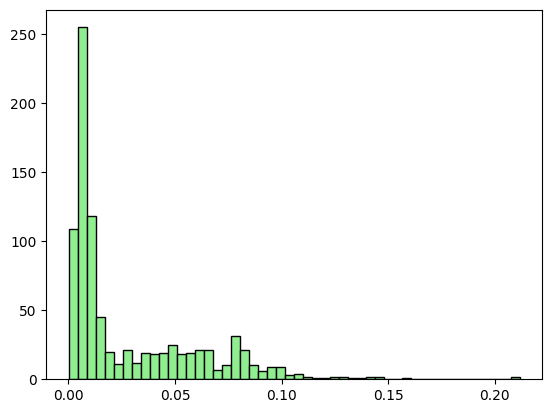

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

path="C:/Users/Miguel/Documents/UNIVERSIDAD/6_MASTER_BIOINFORMATICA/TFM/Repositorio/TFM"

expresion_total_adipose_subcutaneous=pd.read_csv(f"{path}/results/predictXcan/test/vcf_1000G_hg37_mashr/mashr_Adipose_Subcutaneous_predict.txt", sep= "\t")

# vemos la distribución de expresión de algunos genes en nuestra población  
distribucion=expresion_total_adipose_subcutaneous["ENSG00000188290.10"].sort_values(ascending=True)

plt.hist(distribucion, color='lightgreen', ec='black', bins=50)

(array([ 3.,  1.,  3.,  0.,  3.,  2.,  1.,  1.,  7., 10., 10., 10., 10.,
        19., 15., 18., 19., 23., 21., 15., 27., 24., 21., 20., 26., 21.,
        30., 21., 33., 34., 24., 41., 40., 32., 30., 33., 26., 14.,  4.,
         4.,  4.,  7.,  5.,  7., 11., 18., 52., 49., 23.,  6.]),
 array([-0.87161682, -0.83423556, -0.7968543 , -0.75947305, -0.72209179,
        -0.68471054, -0.64732928, -0.60994803, -0.57256677, -0.53518551,
        -0.49780426, -0.460423  , -0.42304175, -0.38566049, -0.34827924,
        -0.31089798, -0.27351672, -0.23613547, -0.19875421, -0.16137296,
        -0.1239917 , -0.08661045, -0.04922919, -0.01184793,  0.02553332,
         0.06291458,  0.10029583,  0.13767709,  0.17505834,  0.2124396 ,
         0.24982086,  0.28720211,  0.32458337,  0.36196462,  0.39934588,
         0.43672714,  0.47410839,  0.51148965,  0.5488709 ,  0.58625216,
         0.62363341,  0.66101467,  0.69839593,  0.73577718,  0.77315844,
         0.81053969,  0.84792095,  0.8853022 ,  0.92268346,

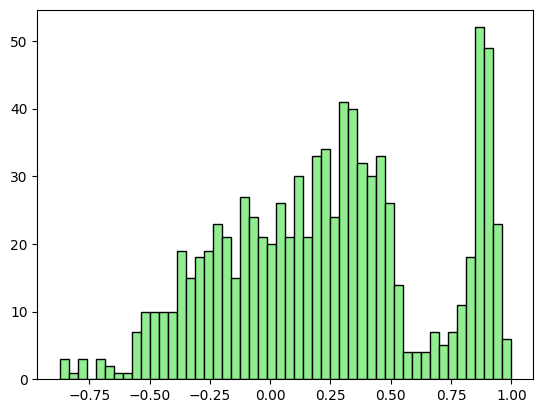

In [2]:


distribucion_2=expresion_total_adipose_subcutaneous["ENSG00000272512.1"].sort_values(ascending=True)


plt.hist(distribucion_2, color='lightgreen', ec='black', bins=50)




(array([ 54.,  24.,  27.,  17.,   6.,   5.,   6.,   4.,   4.,   6.,   3.,
          4.,   5.,   4.,   4.,   4.,   2.,   7.,   3.,   6.,   4.,   9.,
         16.,  29., 157.,  84.,  31.,  16.,   6.,   5.,   7.,   9.,   5.,
          5.,   4.,   2.,  11.,   8.,   1.,   9.,   4.,   4.,   3.,   8.,
          8.,  12.,  18.,  41., 107.,  60.]),
 array([0.        , 0.008907  , 0.01781401, 0.02672101, 0.03562801,
        0.04453502, 0.05344202, 0.06234903, 0.07125603, 0.08016303,
        0.08907004, 0.09797704, 0.10688404, 0.11579105, 0.12469805,
        0.13360505, 0.14251206, 0.15141906, 0.16032607, 0.16923307,
        0.17814007, 0.18704708, 0.19595408, 0.20486108, 0.21376809,
        0.22267509, 0.23158209, 0.2404891 , 0.2493961 , 0.25830311,
        0.26721011, 0.27611711, 0.28502412, 0.29393112, 0.30283812,
        0.31174513, 0.32065213, 0.32955913, 0.33846614, 0.34737314,
        0.35628015, 0.36518715, 0.37409415, 0.38300116, 0.39190816,
        0.40081516, 0.40972217, 0.41862917, 0.

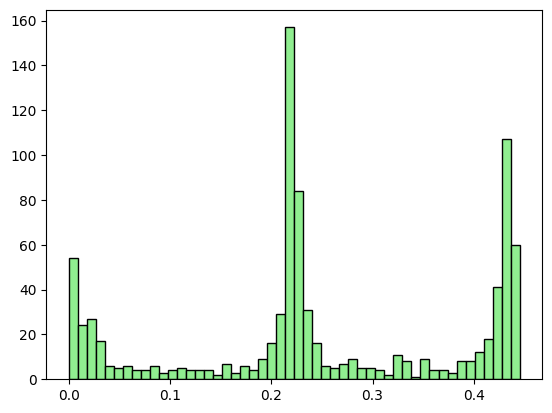

In [3]:
distribucion_3=expresion_total_adipose_subcutaneous["ENSG00000131591.17"].sort_values(ascending=True)


plt.hist(distribucion_3, color='lightgreen', ec='black', bins=50)

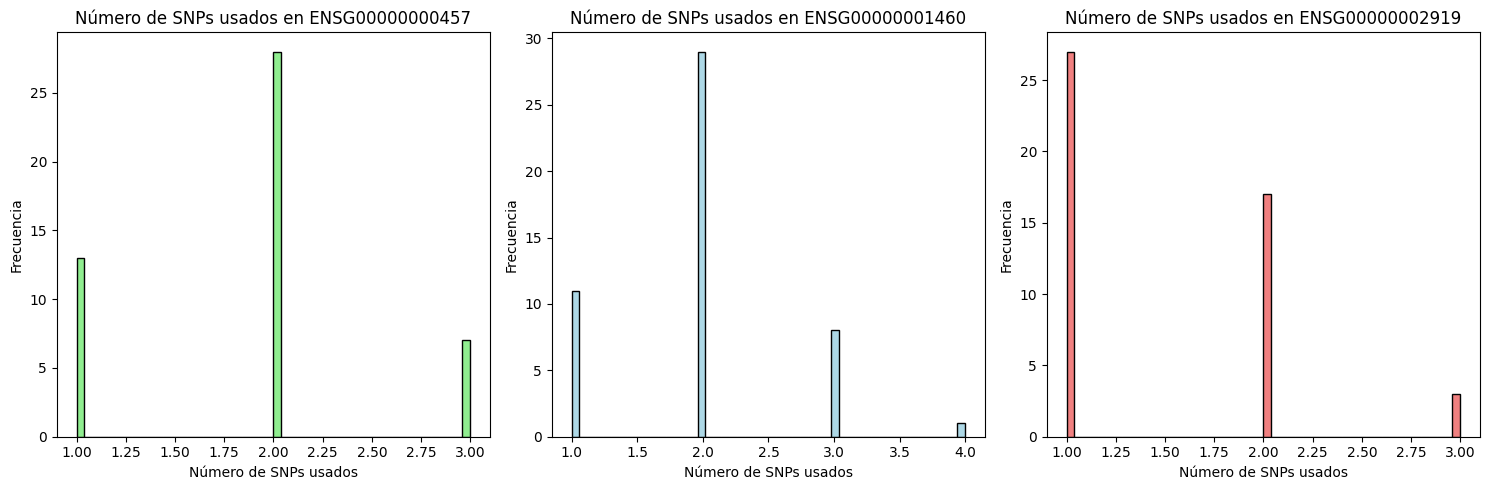

In [10]:
def process_gene_summary_files(gene_name):
    # Definir la lista de archivos de resumen que cumplen con el patrón especificado
    summary_files = [f for f in os.listdir(os.path.join(path, "results/predictXcan/test/vcf_1000G_hg37_mashr")) if f.startswith("mashr_") and f.endswith('_summary.txt')]

    # Crear una lista para almacenar DataFrames temporales
    df_list = []

    # Iterar sobre cada archivo en la lista de archivos de resumen
    for summary_file in summary_files:
        # Construir la ruta completa al archivo
        summary_file_path = os.path.join(path, "results/predictXcan/test/vcf_1000G_hg37_mashr", summary_file)
        
        # Extraer el nombre del tejido del nombre del archivo
        match = re.search(r'mashr_(.*?)_summary\.txt', summary_file)
        tissue_name = match.group(1)
        
        # Leer el archivo CSV en un DataFrame
        df_sub_summary = pd.read_csv(summary_file_path, sep="\t")
        
        # Filtrar el DataFrame para obtener solo las filas del gen especificado
        df_sub_summary = df_sub_summary[df_sub_summary["gene"] == gene_name]
        
        # Añadir una columna para el nombre del tejido
        df_sub_summary["tissue"] = tissue_name
        
        # Agregar el DataFrame filtrado a la lista de DataFrames
        df_list.append(df_sub_summary)

    # Concatenar todos los DataFrames en uno solo usando pd.concat()
    df_summary_gene = pd.concat(df_list, ignore_index=True)

    return df_summary_gene

ENSG00000000457=process_gene_summary_files("ENSG00000000457.13")

ENSG00000001460=process_gene_summary_files("ENSG00000001460.17")

ENSG00000002919=process_gene_summary_files("ENSG00000002919.14")

plt.figure(figsize=(15, 5))  # Configura el tamaño de la figura

# Primer histograma para ENSG00000000457
plt.subplot(1, 3, 1)  # (filas, columnas, índice del gráfico)
plt.hist(ENSG00000000457["n_snps_used"], color='lightgreen', ec='black', bins=50)
plt.title("Número de SNPs usados en ENSG00000000457")
plt.xlabel("Número de SNPs usados")
plt.ylabel("Frecuencia")

# Segundo histograma para ENSG00000001460
plt.subplot(1, 3, 2)
plt.hist(ENSG00000001460["n_snps_used"], color='lightblue', ec='black', bins=50)
plt.title("Número de SNPs usados en ENSG00000001460")
plt.xlabel("Número de SNPs usados")
plt.ylabel("Frecuencia")

# Tercer histograma para ENSG00000002919
plt.subplot(1, 3, 3)
plt.hist(ENSG00000002919["n_snps_used"], color='lightcoral', ec='black', bins=50)
plt.title("Número de SNPs usados en ENSG00000002919")
plt.xlabel("Número de SNPs usados")
plt.ylabel("Frecuencia")

# Ajustar el diseño y mostrar los histogramas
plt.tight_layout()
plt.show()